# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

Выбрано 6 пункт: [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год

Будем смотреть только 1 из 5 файлов: Google_Historical_StockPrice2.csv

Обрабатывать недостающие данные не нужно - их попросту нет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (18, 9)

np.set_printoptions(suppress=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2016-03-28 to 2021-03-26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB
                  Date         Open         High          Low        Close  \
Date                                                                         
2016-03-28  2016-03-28   736.789978   738.989990   732.500000   733.530029   
2016-03-29  2016-03-29   734.590027   747.250000   728.760010   744.770020   
2016-03-30  2016-03-30   750.099976   757.880005   748.739990   750.530029   
2016-03-31  2016-03-31   749.250000   750.849976   740.940002  

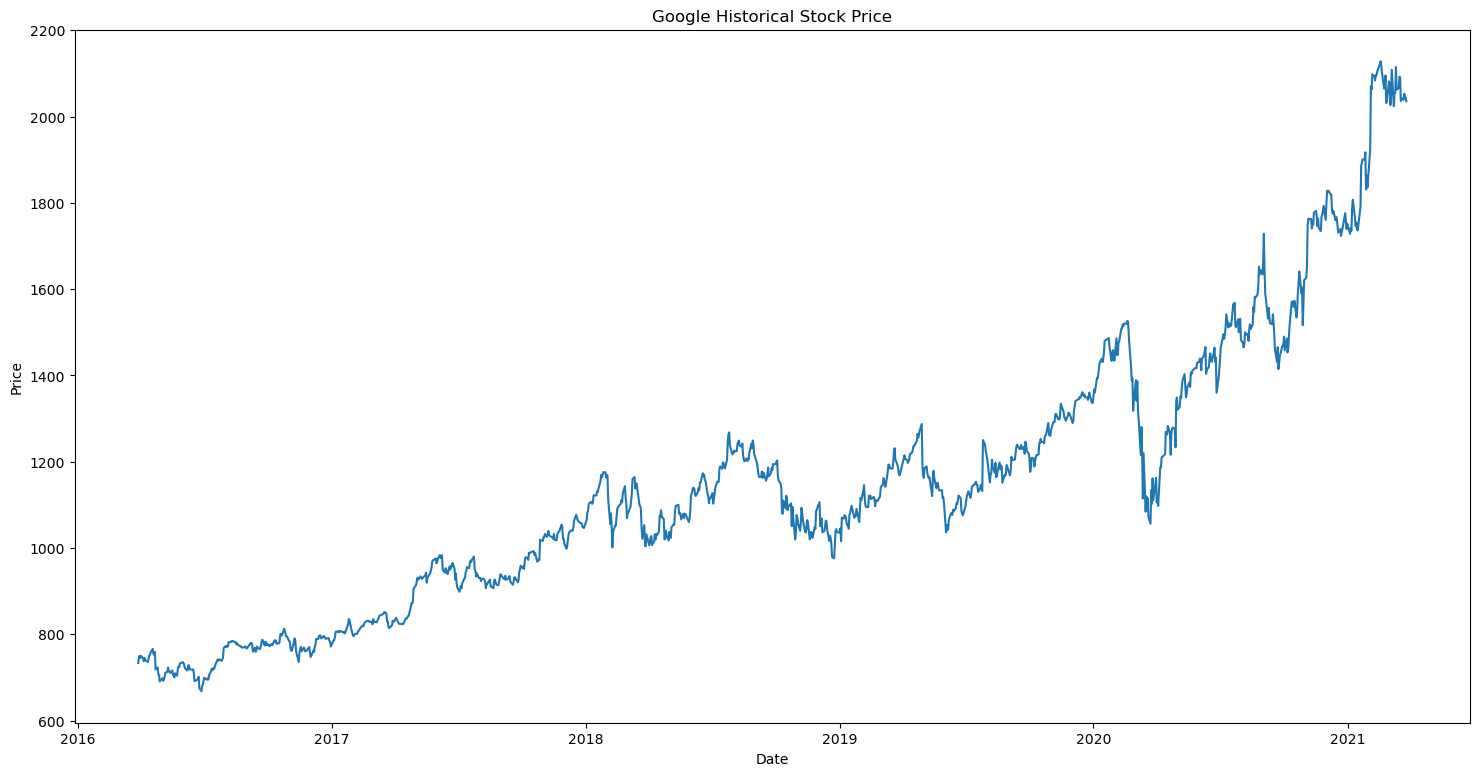

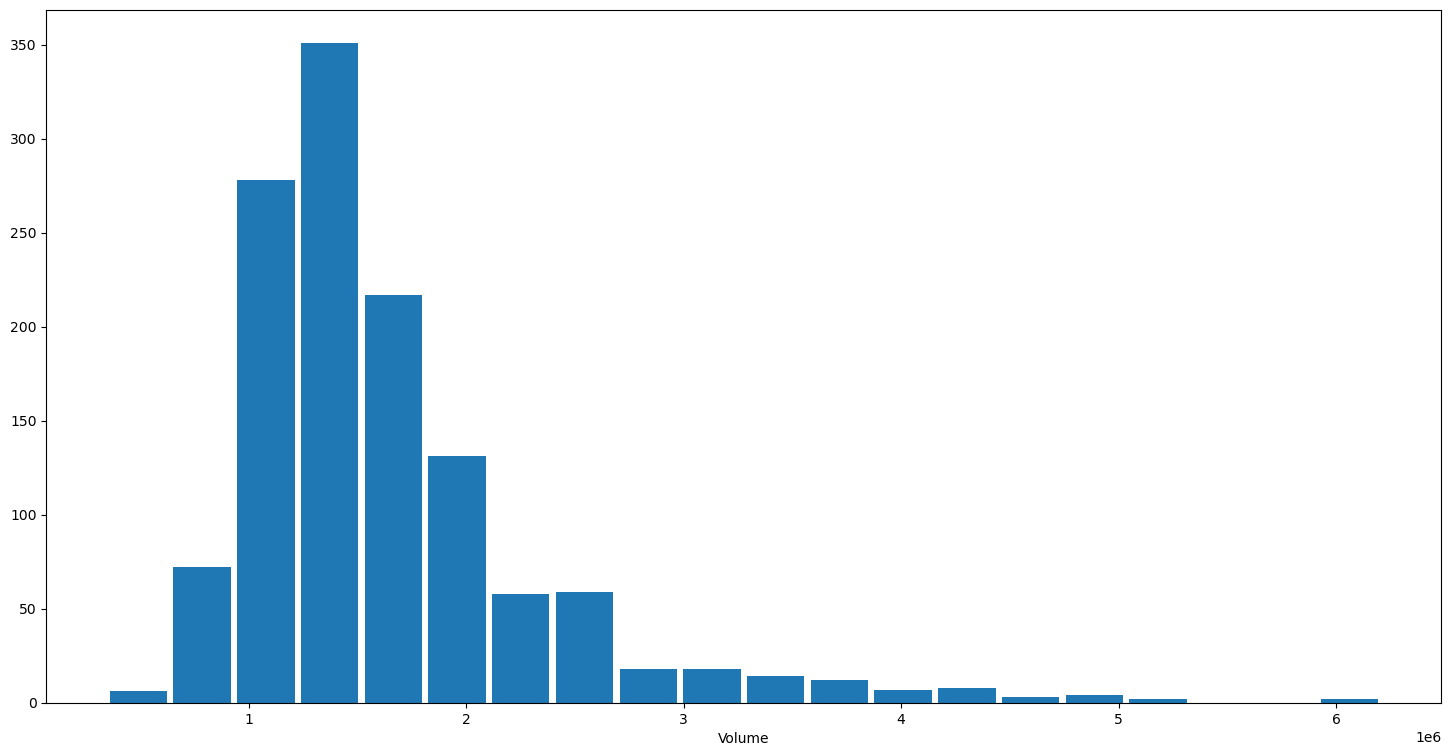

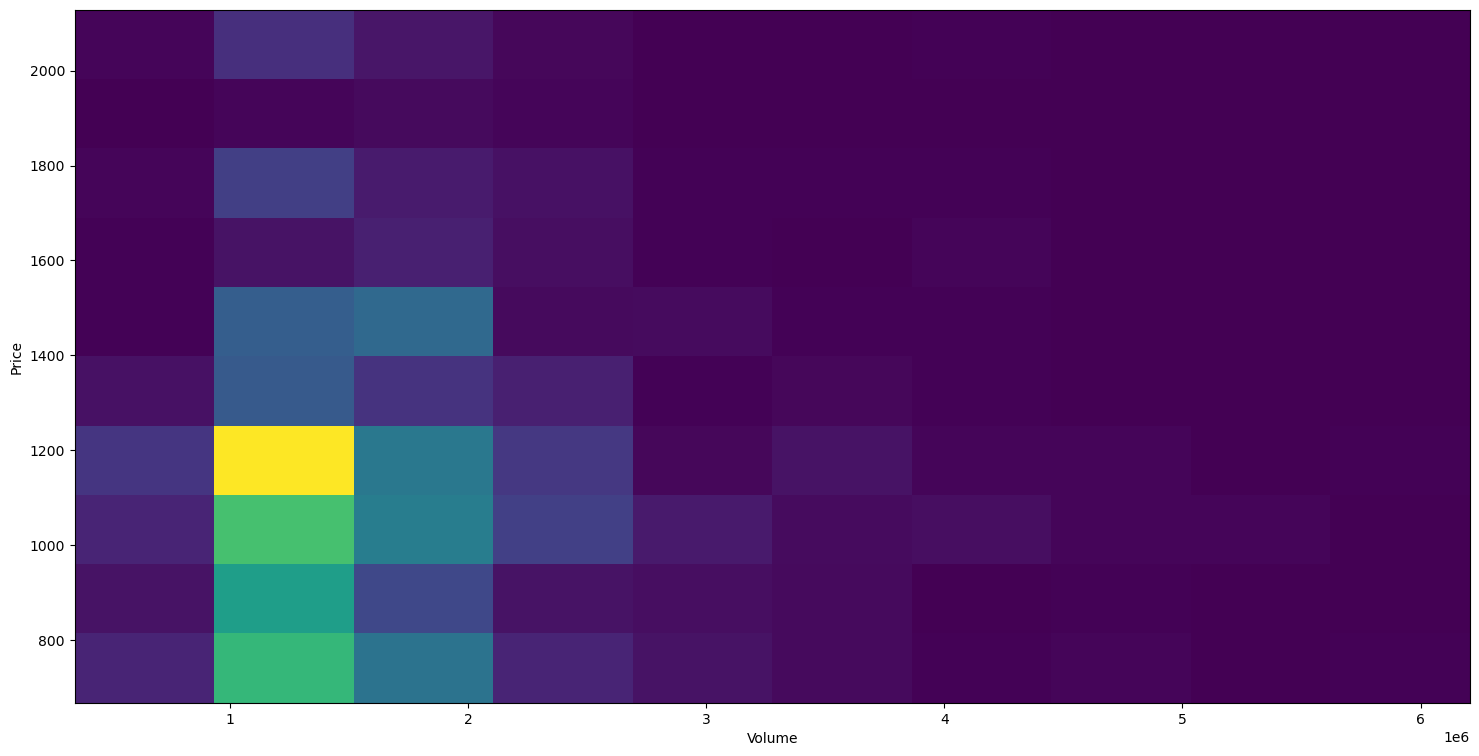

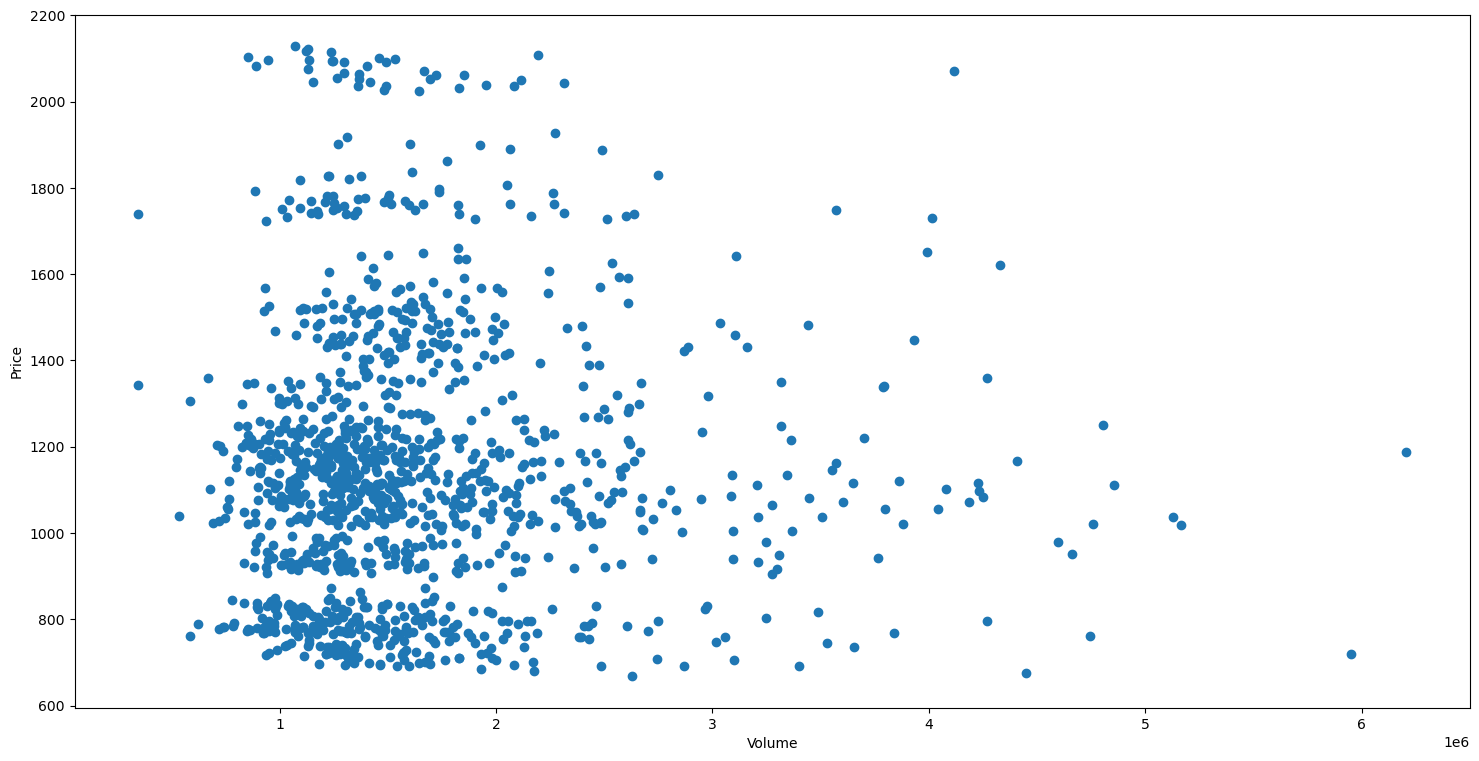

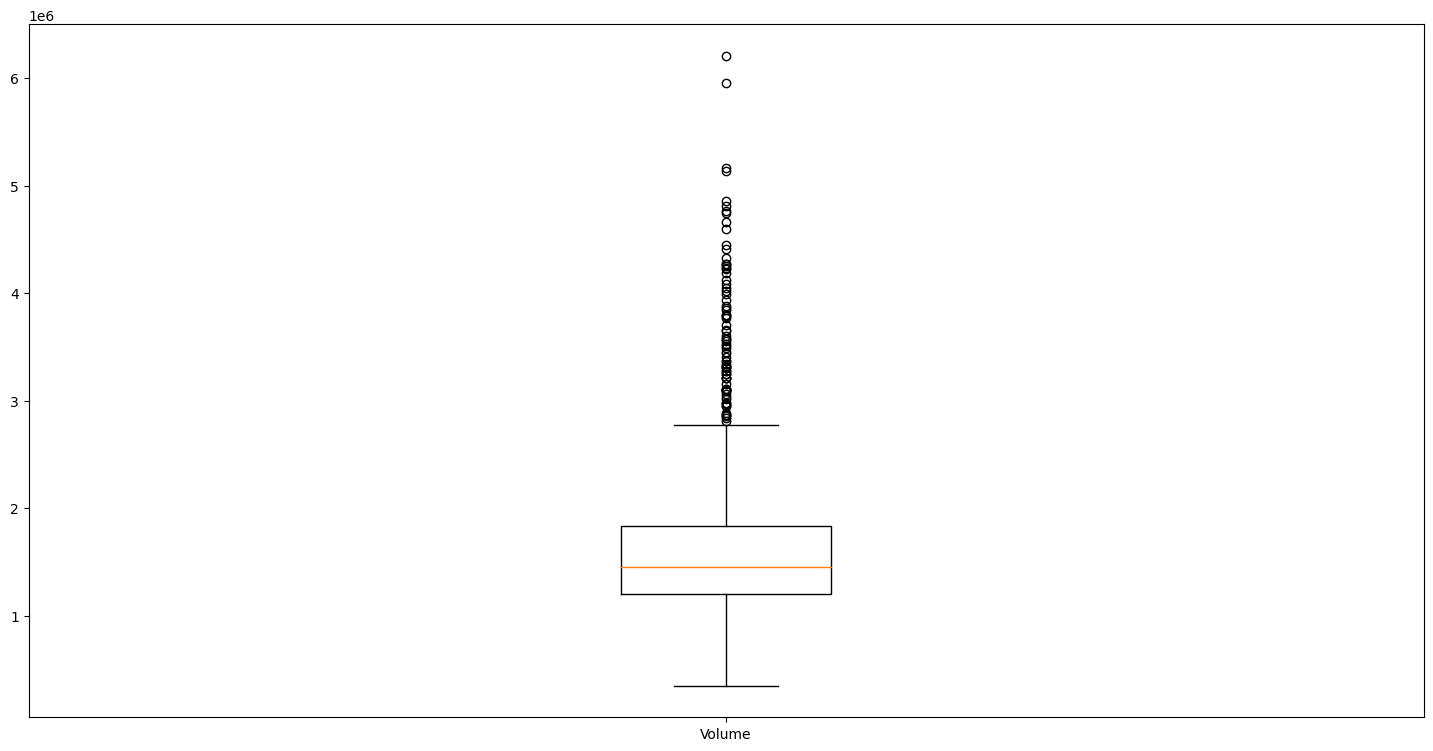

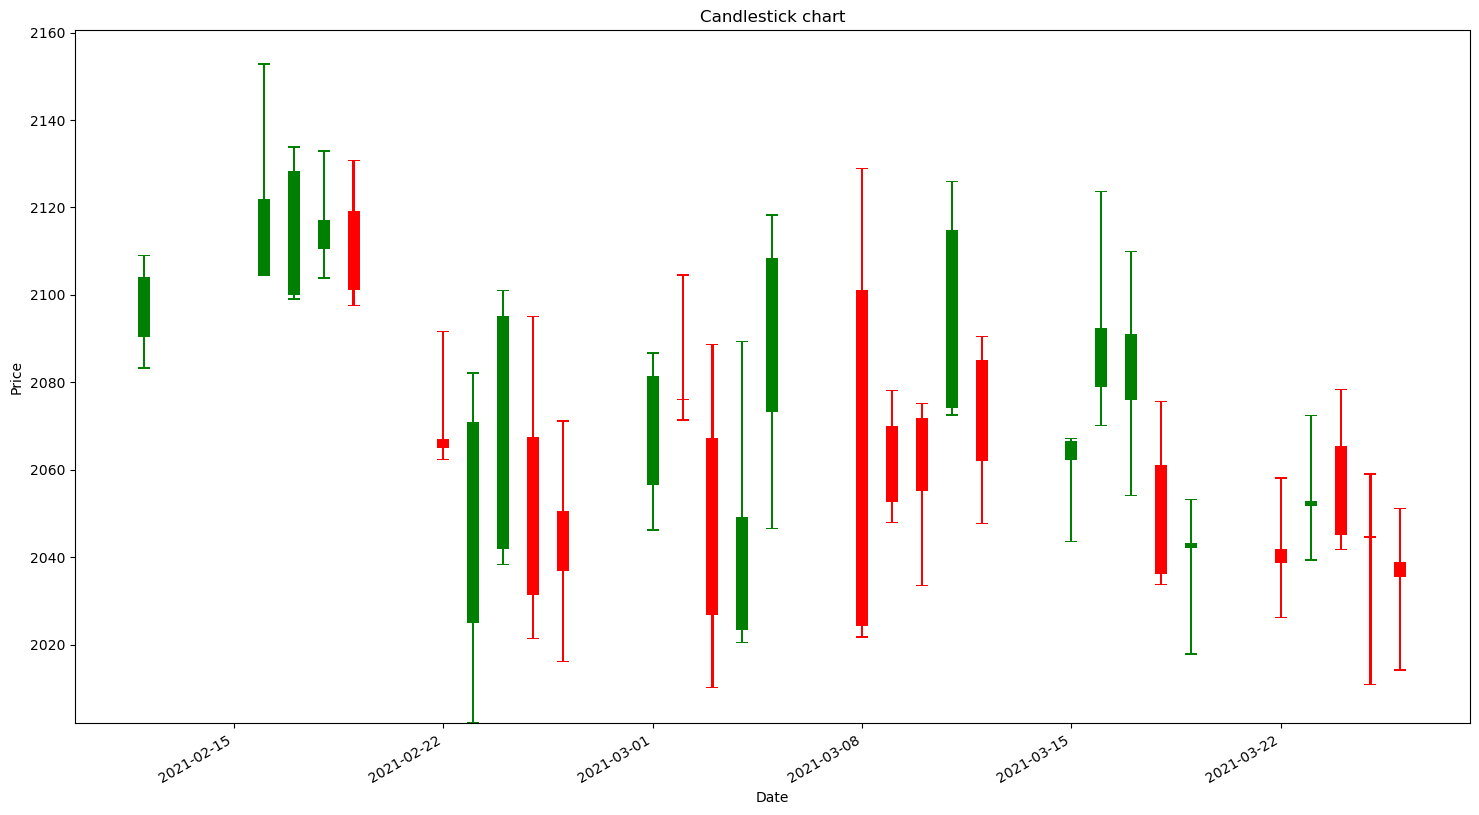

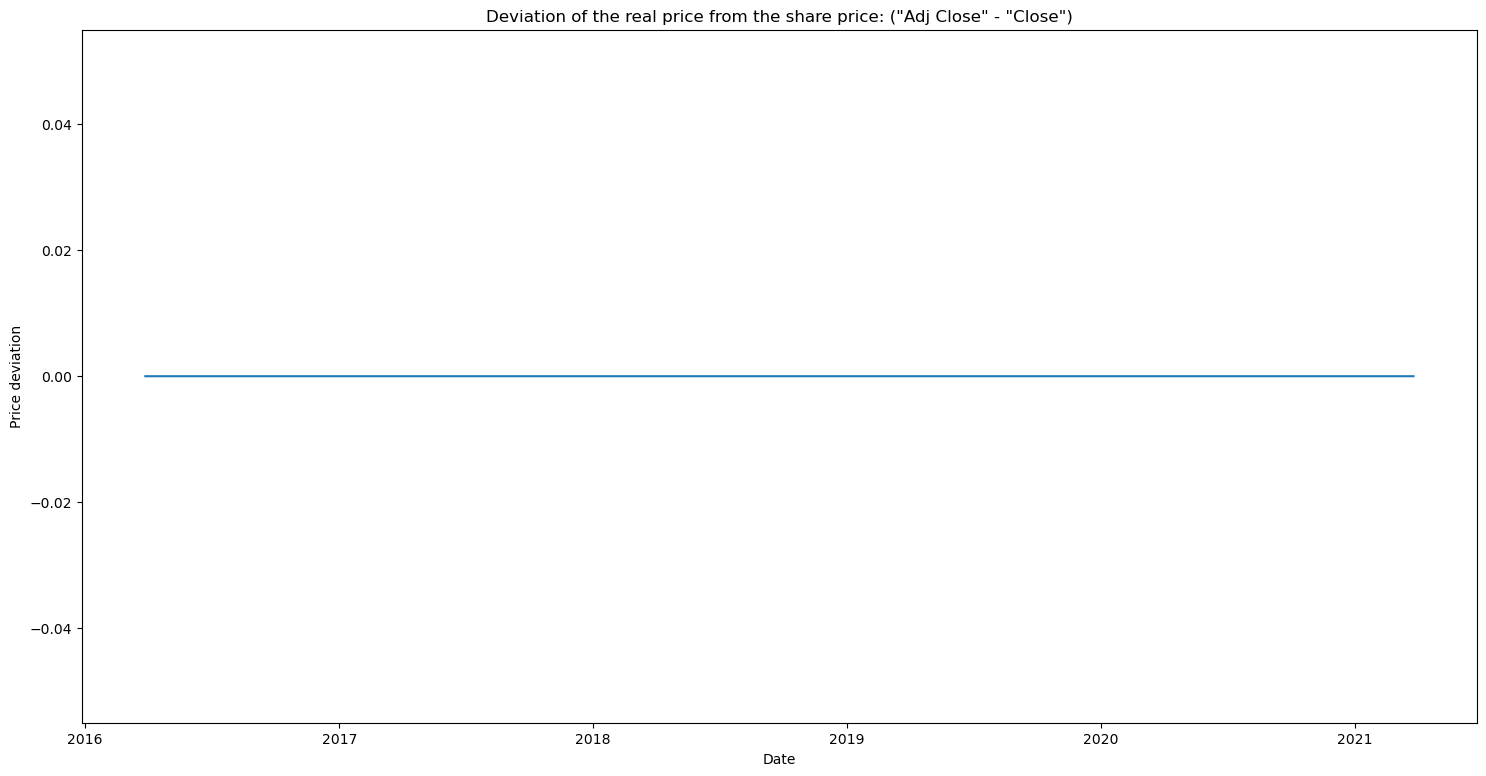

In [2]:
file_path = "archive/Google_Historical_StockPrice2.csv"
data = pd.read_csv(file_path)
# data = pd.read_csv(file_path, index_col="Date")
data.index = pd.to_datetime(data.Date)
# pd.date_range
data.info()
print(data)

plt.figure()

data_tail = data.tail(30)

####
plt.plot(data.index, data["Adj Close"], "-")
plt.title("Google Historical Stock Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

####
plt.hist(data.Volume, 20, rwidth=0.9)
plt.xlabel('Volume')
plt.show()

####
plt.hist2d(data.Volume, data["Adj Close"])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

####
plt.scatter(data.Volume, data["Adj Close"] )
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

####
plt.boxplot(data.Volume, labels = ["Volume"])
# plt.ylabel('Volume')
plt.show()

####
up = data_tail[data_tail.Close >= data_tail.Open]
down = data_tail[data_tail.Close < data_tail.Open]
col1 = 'green'
col2 = 'red'
width = .4
width2 = .07
high1 = .3
plt.bar(up.index, up.Close - up.Open, width, bottom=up.Open, color=col1)
plt.bar(up.index, up.High - up.Close, width2, bottom=up.Close, color=col1)
plt.bar(up.index, up.Low - up.Open, width2, bottom=up.Open, color=col1)
plt.bar(up.index, high1, width, bottom=up.Low, color=col1)
plt.bar(up.index, high1, width, bottom=up.High, color=col1)

plt.bar(down.index, down.Close - down.Open, width, bottom=down.Open, color=col2)
plt.bar(down.index, down.High - down.Open, width2, bottom=down.Open, color=col2)
plt.bar(down.index, down.Low - down.Close, width2, bottom=down.Close, color=col2)
plt.bar(down.index, high1, width, bottom=down.Low, color=col2)
plt.bar(down.index, high1, width, bottom=down.High, color=col2)

plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Candlestick chart")
plt.show()

####
plt.plot(data.index, data["Adj Close"] - data["Close"], "-")
plt.title("Deviation of the real price from the share price: (\"Adj Close\" - \"Close\")")
plt.xlabel('Date')
plt.ylabel('Price deviation')
plt.show()

In [3]:
data["Range"] = data.High - data.Low
plt.hist(data.Range, rwidth=0.9)
plt.xlabel('Price range per day')
plt.show()
data.to_csv("New_Google_price.csv")

KeyboardInterrupt: 

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

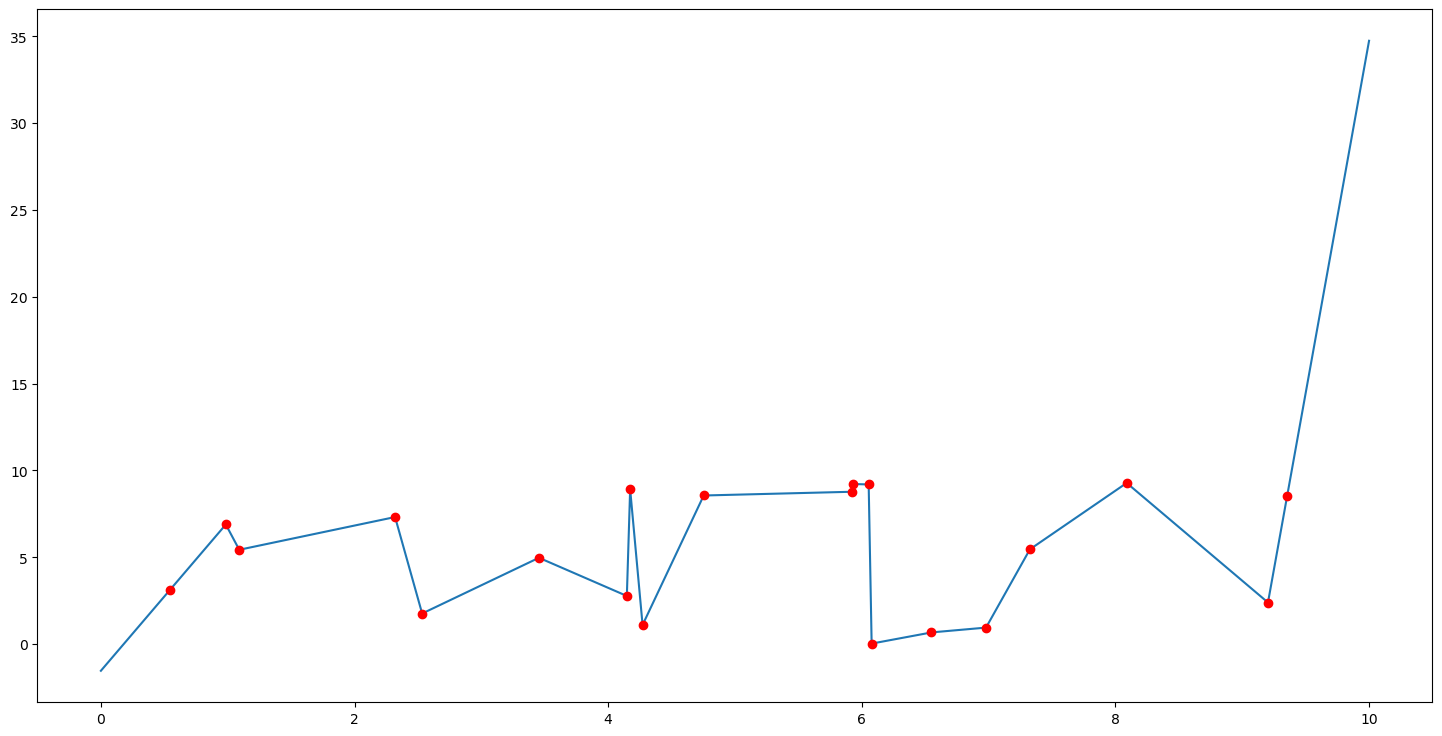

In [16]:
# import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from random import *
count_dots=20
x = [uniform(0, 10) for _ in range(count_dots)]
y = [uniform(0, 10) for _ in range(count_dots)]
f2 = interp1d(x, y, kind='linear', fill_value='extrapolate')
x_new2 = np.linspace(0, 10, 10000)
y_new2 = f2(x_new2)
plt.plot(x_new2, y_new2, "-")
plt.plot(x, y, "ro")
plt.show()


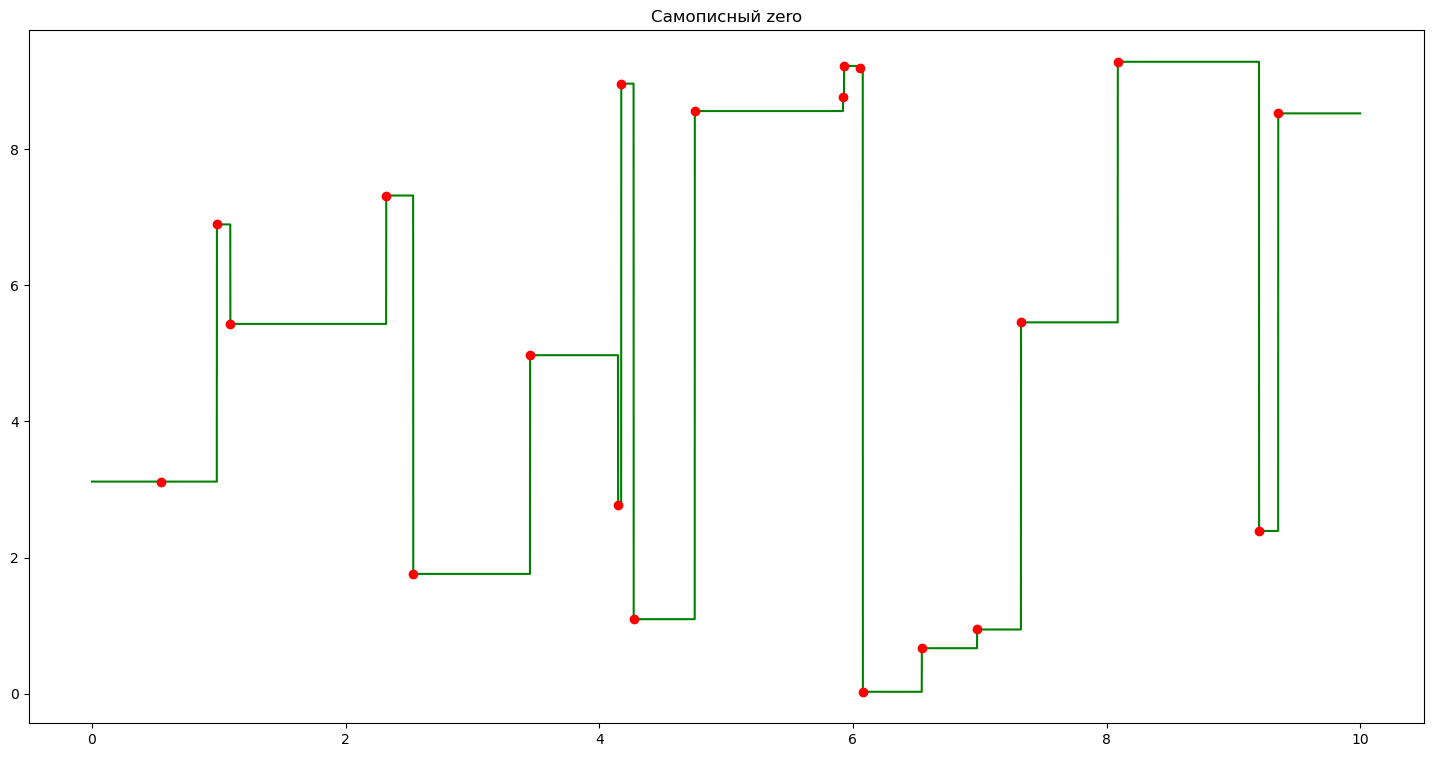

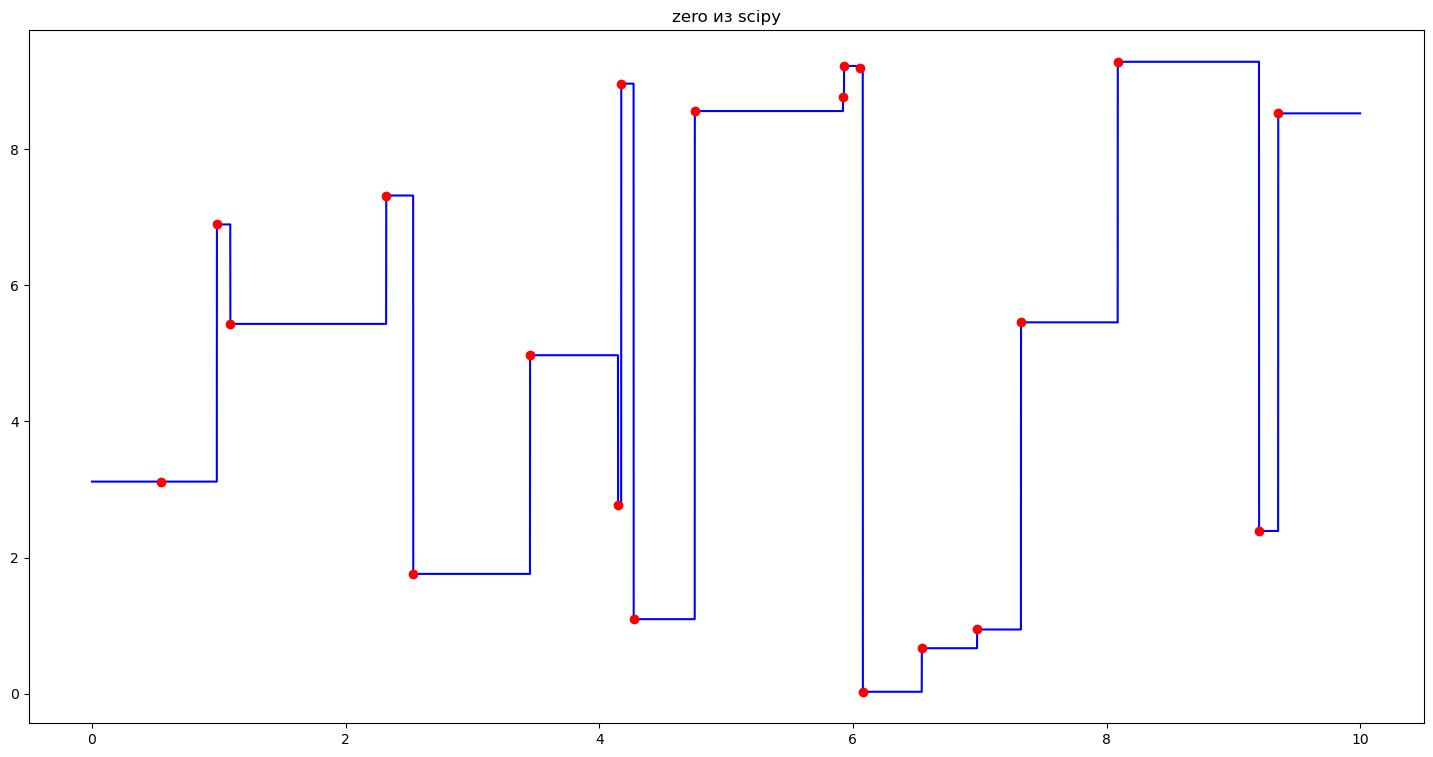

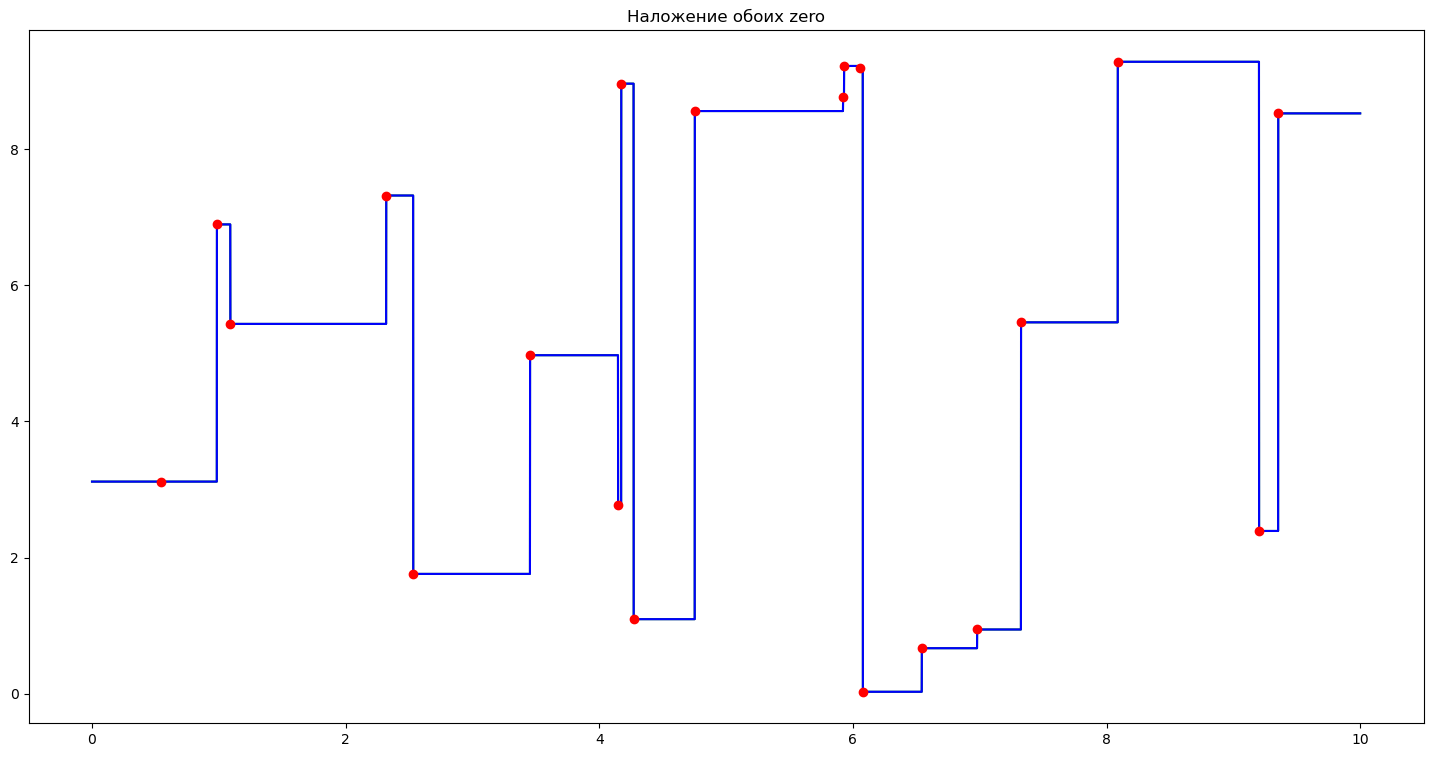

In [17]:
# x = [0, 0, 1, 1, 2, 3] # Ломает самописный
# y = [0, 2, 2, 1, 1, 3]

def zero_interpolate(x: list, y: list, extrapolate=True):
    assert len(x) == len(y) > 0
    dots = sorted([(x[i], y[i]) for i in range(len(x))])

    def get_dot(x_dot):
        if x_dot < dots[0][0]:
            if extrapolate:
                return dots[0][1]
            raise ValueError("A value in x_new is below the interpolation range.")
        elif dots[-1][0] < x_dot:
            if extrapolate:
                return dots[-1][1]
            raise ValueError("A value in x_new is below the interpolation range.")

        l = 0
        r = len(dots)
        while r - l > 1:
            m = (r + l) // 2
            if dots[m][0] < x_dot:
                l = m
            else:
                r = m

        return dots[l][1]

    def _zero_interpolate(x_new):
        return [get_dot(dot) for dot in x_new]

    return _zero_interpolate

f1 = zero_interpolate(x, y, True)
x_new1 = np.linspace(0, 10, 10000)
y_new1 = f1(x_new1)
f2 = interp1d(x, y, kind='zero', fill_value='extrapolate')
x_new2 = np.linspace(0, 10, 10000)
y_new2 = f2(x_new2)
plt.plot(x_new1, y_new1, "g-")
plt.plot(x, y, "ro")
plt.title("Самописный zero")
plt.show()
plt.plot(x_new2, y_new2, "b-")
plt.plot(x, y, "ro")
plt.title("zero из scipy")
plt.show()
plt.plot(x_new1, y_new1, "g-")
plt.plot(x_new2, y_new2, "b-")
plt.plot(x, y, "ro")
plt.title("Наложение обоих zero")
plt.show()


# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [1. 0. 2. 2. 2. 1. 3.]
Названия колонок: [-1.  0.  1.  2.  3.  4.  5.  6.]


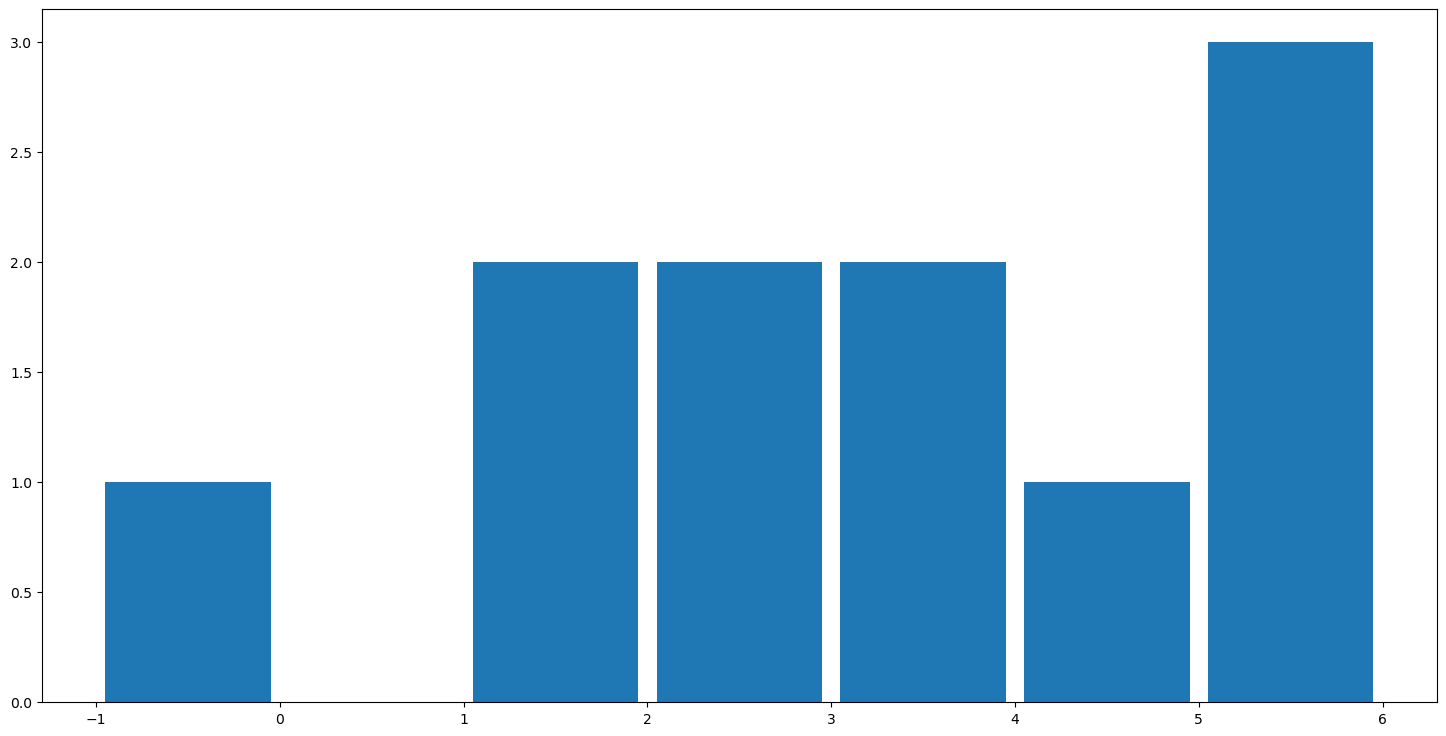

In [7]:
# Пример гистограммы с помощью plt.hist()

import matplotlib.pyplot as plt
import numpy as np

array = [-1,1,2,3,4,1,2,3,5,6,6]

value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [8]:
from typing import List, Tuple, Union

## O(n*logn)
def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    if bins <= 0:
        raise
    arr = sorted(array)

    mi = arr[0]
    ma = arr[-1]

    bins_names = list(np.linspace(mi, ma, bins + 1))

    def bin_search_rightpos(l, r, zn):
        while r - l > 1:
            m = (r + l) // 2
            if arr[m] < zn:
                l = m
            else:
                r = m
        return r

    value_counts = [None for _ in range(bins)]
    past = 0
    for i in range(bins - 1):
        get = bin_search_rightpos(past - 1, len(arr), bins_names[i+1])
        value_counts[i] = get - past
        past = get

    value_counts[-1] = len(arr) - past

    return value_counts, bins_names

In [9]:
def fast_hist_show(value_counts, bins_names):
    plt.figure()
    for i in range(len(value_counts)):
        plt.bar((bins_names[i] + bins_names[i+1]) / 2, value_counts[i],
                    # color=col1,
                    bottom=0)
    plt.show()

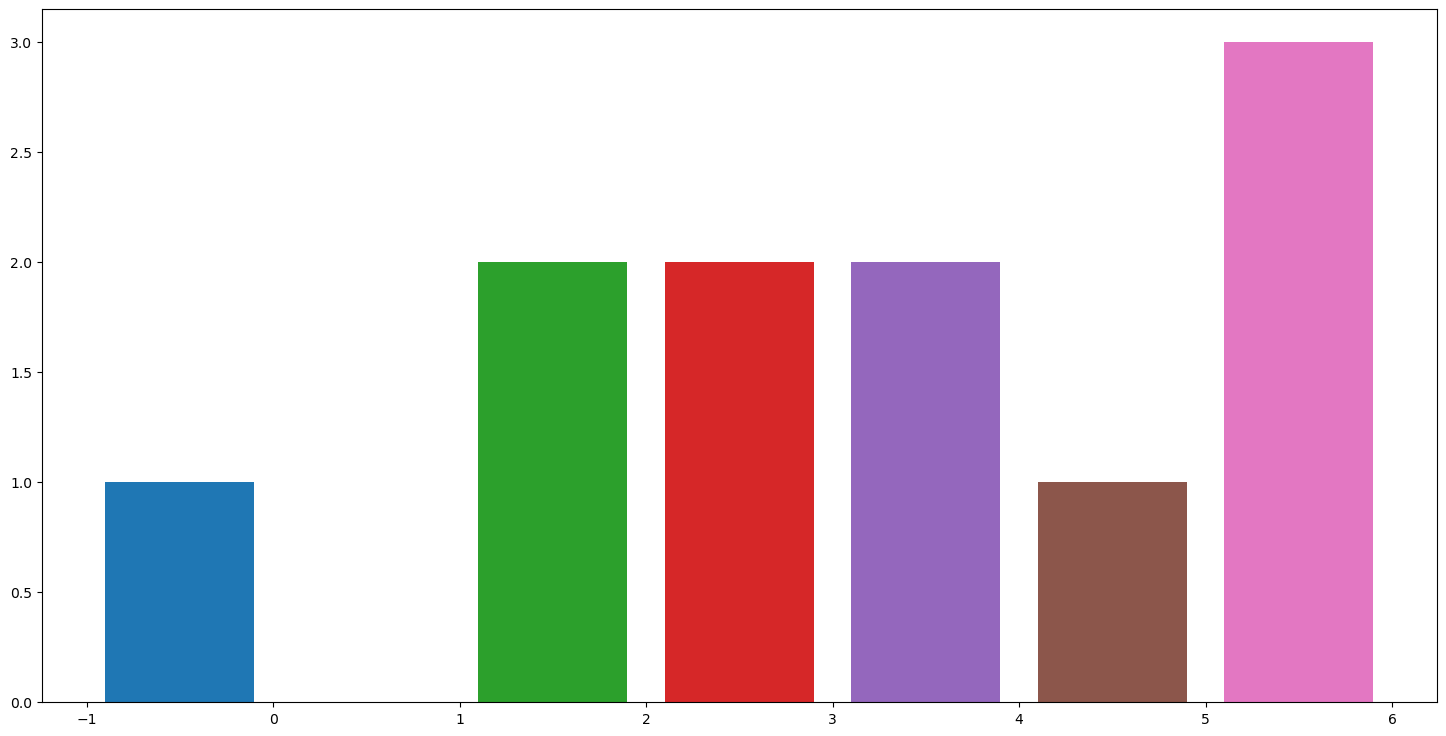

In [10]:
# %%timeit
fast_hist_show(*fast_hist(array, len(set(array))))

In [11]:
from random import randint
array = [randint(0, 10) for i in range(100000)]

In [12]:
%%timeit
out = fast_hist(array, len(set(array)))

6.76 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


312 ms ± 5.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


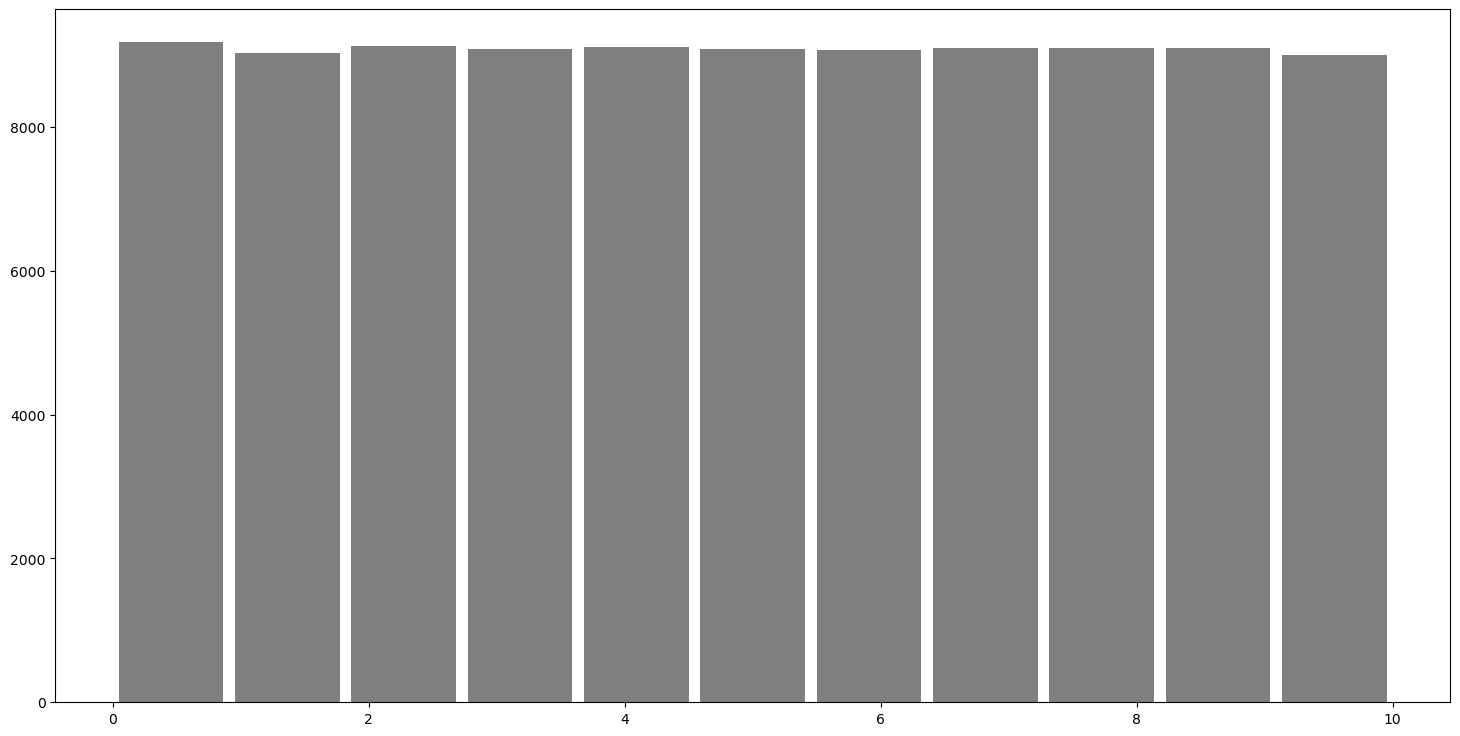

In [13]:
%%timeit
plt.hist(array,
        bins=len(set(array)),
        rwidth=0.9)

[9180. 9034. 9124. 9086. 9112. 9093. 9073. 9098. 9101. 9095. 9004.]
[9180, 9034, 9124, 9086, 9112, 9093, 9073, 9098, 9101, 9095, 9004]
[ 0.          0.90909091  1.81818182  2.72727273  3.63636364  4.54545455
  5.45454545  6.36363636  7.27272727  8.18181818  9.09090909 10.        ]
[0.0, 0.9090909090909091, 1.8181818181818181, 2.727272727272727, 3.6363636363636362, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.2727272727272725, 8.181818181818182, 9.09090909090909, 10.0]


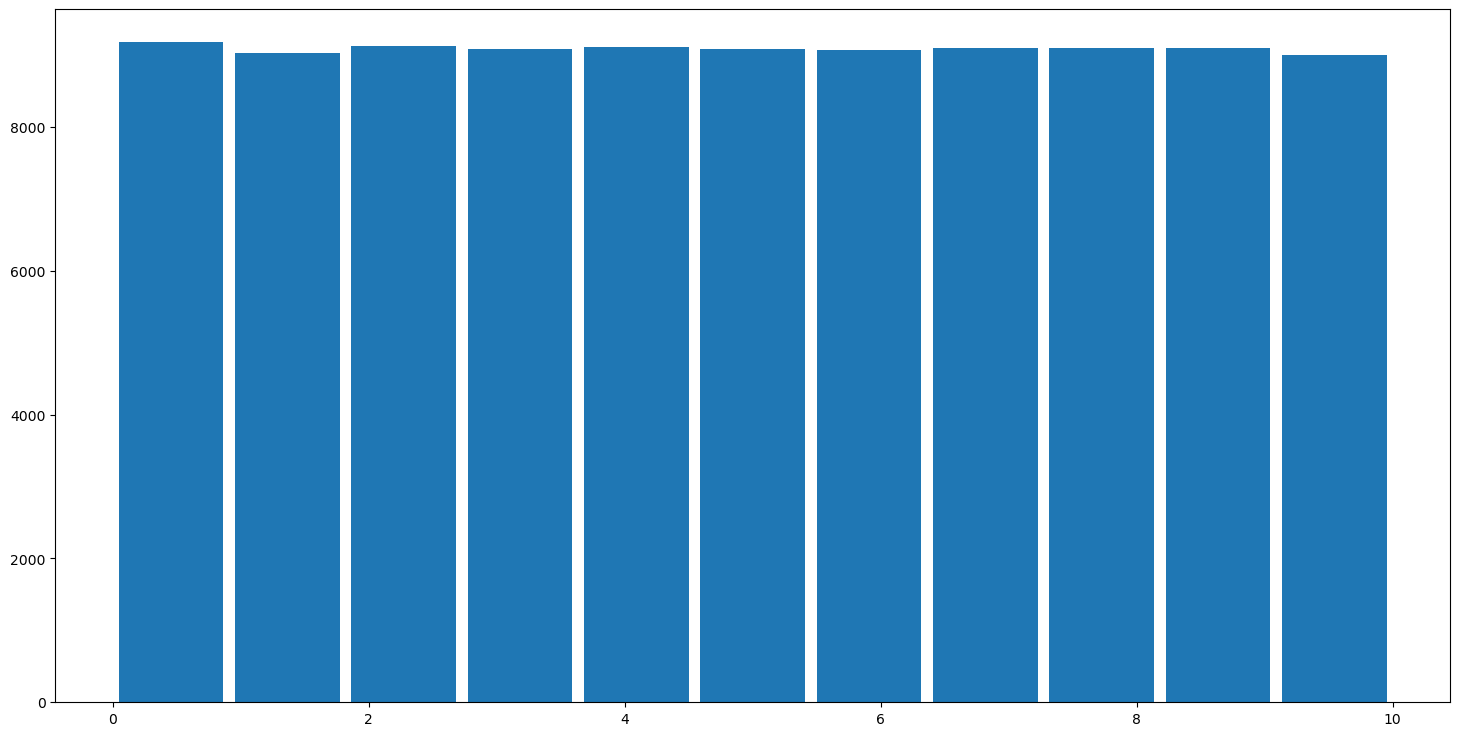

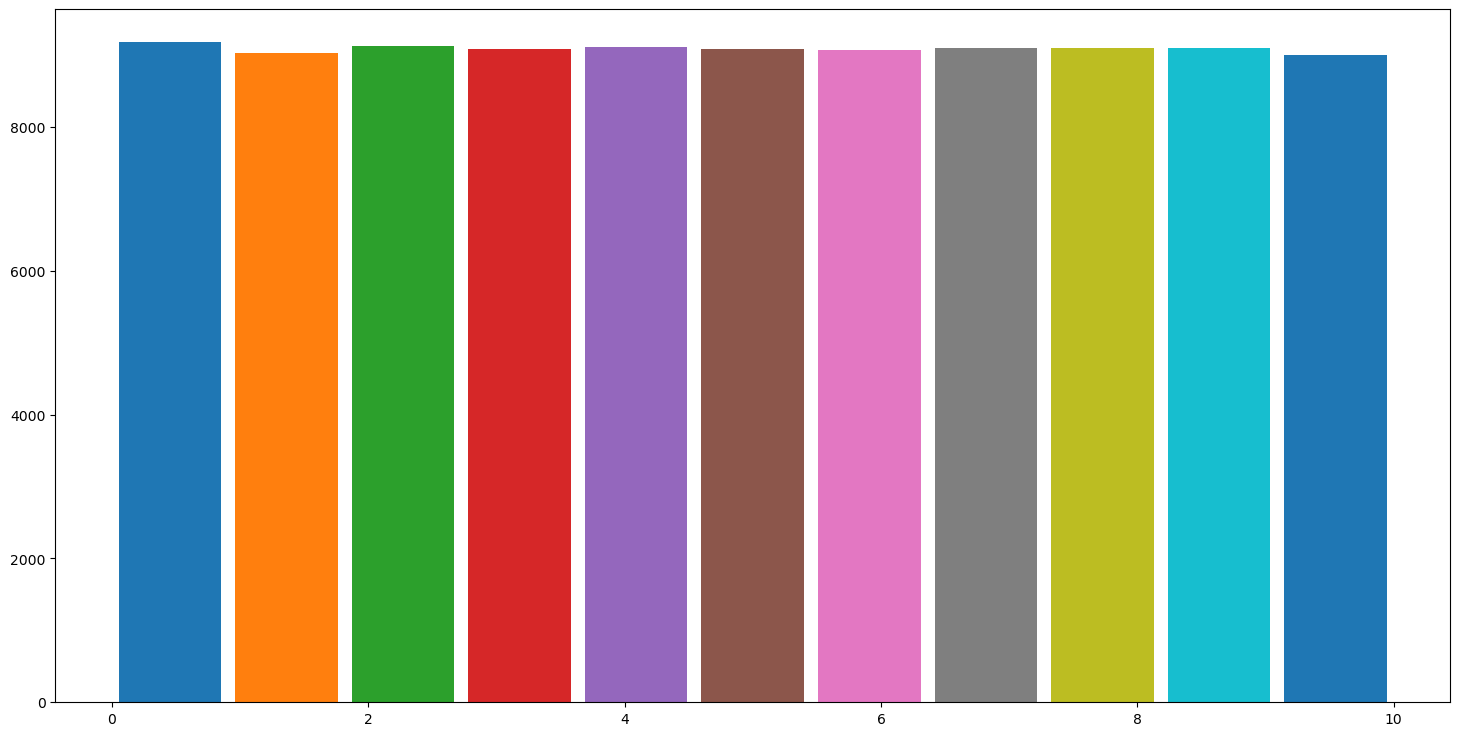

In [14]:
from random import randint
# array = [randint(0, 10) for i in range(50)]

value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)),
                                                   rwidth=0.9)



out = fast_hist(array, len(set(array)))
print(value_counts)
print(out[0])
print(bins_names)
print(out[1])
fast_hist_show(*out)